<h4> OJAR Customer Segmentation Project
<h4> Author: Ahmed Ait Si Hamou
<h4> Description: RFM Segmentation of customer purchase data for targeted marketing

### 01. Import libraries & Data

In [1]:
# importing necessary libraries

import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load Data

transactions_df = pd.read_csv(r"C:\Users\Mugen\Desktop\03 - Data Analysis Portfolio Projects\02 - Customer Segmentation for OJAR (Perfume Brand)\02 - OJAR Datasets\01 - ojar_transactions_table.csv")
products_df = pd.read_csv(r"C:\Users\Mugen\Desktop\03 - Data Analysis Portfolio Projects\02 - Customer Segmentation for OJAR (Perfume Brand)\02 - OJAR Datasets\02 - ojar_product_catalog.csv")

### 02. Data Overview & Data Preparation

##### A. Transaction Data

In [4]:
transactions_df.head()

,customer_id,order_id,order_date,category,product_name
0,CUST00001,O420277,2023-03-23 08:20:57,Luxury Collection,Royal Rose
1,CUST00001,O526677,2023-03-27 17:39:53,Unisex Blends,Woody Spice
2,CUST00001,O674463,2024-01-26 05:17:30,Everyday Wear,Ocean Breeze
3,CUST00001,O709154,2024-04-06 00:14:38,Luxury Collection,Royal Rose
4,CUST00002,O461450,2023-12-14 23:37:13,Luxury Collection,Amber Oud


In [5]:
# Check the data types and null values in the dataset

transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45044 entries, 0 to 45043
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   45044 non-null  object
 1   order_id      45044 non-null  object
 2   order_date    45044 non-null  object
 3   category      45044 non-null  object
 4   product_name  45044 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [6]:
# Check the data types and null values in the dataset

transactions_df.duplicated().sum()

0

In [7]:
# Check unique values in the category column

transactions_df["category"].unique()

array(['Luxury Collection', 'Unisex Blends', 'Everyday Wear'],
      dtype=object)

In [8]:
# Check unique values in the product_name column

transactions_df["product_name"].unique()

array(['Royal Rose', 'Woody Spice', 'Ocean Breeze', 'Amber Oud',
       'Velvet Oud', 'Smoky Leather', 'Citrus Fresh', 'Green Vetiver',
       'Saffron Musk'], dtype=object)

In [10]:
# Convert order_date to datetime format
transactions_df["order_date"] = pd.to_datetime(transactions_df["order_date"])

# Extract only the date part
transactions_df["order_date"] = transactions_df["order_date"].dt.date
transactions_df.head()

,customer_id,order_id,order_date,category,product_name
0,CUST00001,O420277,2023-03-23,Luxury Collection,Royal Rose
1,CUST00001,O526677,2023-03-27,Unisex Blends,Woody Spice
2,CUST00001,O674463,2024-01-26,Everyday Wear,Ocean Breeze
3,CUST00001,O709154,2024-04-06,Luxury Collection,Royal Rose
4,CUST00002,O461450,2023-12-14,Luxury Collection,Amber Oud


##### B. Product Data

In [11]:
products_df

,product_name,category,price
0,Amber Oud,Luxury Collection,92.80
1,Citrus Fresh,Everyday Wear,94.67
2,Green Vetiver,Everyday Wear,96.11
3,Ocean Breeze,Everyday Wear,94.45
4,Royal Rose,Luxury Collection,96.25
5,Saffron Musk,Luxury Collection,94.88
6,Smoky Leather,Unisex Blends,96.56
7,Velvet Oud,Unisex Blends,95.89
8,Woody Spice,Unisex Blends,97.23


In [12]:
# Check the data types and null values in the dataset

products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  9 non-null      object 
 1   category      9 non-null      object 
 2   price         9 non-null      float64
dtypes: float64(1), object(2)
memory usage: 348.0+ bytes


In [13]:
products_df.describe()

,price
count,9.000000
mean,95.426667
std,1.351878
min,92.800000
25%,94.670000
50%,95.890000
75%,96.250000
max,97.230000


##### Join Tables

In [14]:
# Merge the two df on category and product_name
merged_df = transactions_df.merge(products_df, on=["category", "product_name"], how="left")

merged_df.head()

,customer_id,order_id,order_date,category,product_name,price
0,CUST00001,O420277,2023-03-23,Luxury Collection,Royal Rose,96.25
1,CUST00001,O526677,2023-03-27,Unisex Blends,Woody Spice,97.23
2,CUST00001,O674463,2024-01-26,Everyday Wear,Ocean Breeze,94.45
3,CUST00001,O709154,2024-04-06,Luxury Collection,Royal Rose,96.25
4,CUST00002,O461450,2023-12-14,Luxury Collection,Amber Oud,92.80


In [15]:
# Check the data types and null values in the dataset
merged_df.isnull().sum()

customer_id     0
order_id        0
order_date      0
category        0
product_name    0
price           0
dtype: int64

### RFM Calculation

In [16]:
# Use latest order date in dataset as the reference point
latest_date = merged_df["order_date"].max()

latest_date

datetime.date(2024, 12, 30)

In [17]:
# Create RFM table
rfm_df =merged_df.groupby("customer_id").agg({
    "order_date": lambda x: (latest_date - x.max()).days, # Recency
    "order_id": "nunique",                                # Frequency
    "price": "sum"                                        # Monetary
}).reset_index()

# Rename the columns
rfm_df.columns = ["Customer_id", "Recency", "Frequency", "Monetary"]

# Check the RFM table
rfm_df.head()

,Customer_id,Recency,Frequency,Monetary
0,CUST00001,268,4,384.18
1,CUST00002,210,3,284.94
2,CUST00003,116,6,570.17
3,CUST00004,243,3,287.02
4,CUST00005,576,1,92.80


In [18]:
# Use quintiles to assign scores (1 = low, 5 = high)
rfm_df["R_Score"] = pd.qcut(rfm_df["Recency"], 5, labels=[5, 4, 3, 2, 1]).astype(int)
rfm_df["F_Score"] = pd.qcut(rfm_df["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5]).astype(int)
rfm_df["M_Score"] = pd.qcut(rfm_df["Monetary"], 5, labels=[1, 2, 3, 4, 5]).astype(int)

# Check the RFM table with scores
rfm_df.head()

,Customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,CUST00001,268,4,384.18,2,4,4
1,CUST00002,210,3,284.94,2,2,3
2,CUST00003,116,6,570.17,3,5,5
3,CUST00004,243,3,287.02,2,2,3
4,CUST00005,576,1,92.80,1,1,1


In [19]:
# Create RFM Score
rfm_df["RFM_Score"] = rfm_df["R_Score"].astype(str) + rfm_df["F_Score"].astype(str) + rfm_df["M_Score"].astype(str)
rfm_df.head()

,Customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,CUST00001,268,4,384.18,2,4,4,244
1,CUST00002,210,3,284.94,2,2,3,223
2,CUST00003,116,6,570.17,3,5,5,355
3,CUST00004,243,3,287.02,2,2,3,223
4,CUST00005,576,1,92.80,1,1,1,111


In [20]:
# Customer segmentation based on RFM Score

def segment_customer(row):
    r, f, m = row["R_Score"], row["F_Score"], row["M_Score"]
    if r >= 4 and f >= 4 and m >= 4:
        return "High-Value Champions"
    elif r >= 3 and f >= 3:
        return "Loyal Customers"
    elif r <= 2 and f <= 2 and m <= 2:
        return "At-Risk"
    elif f == 1:
        return "One-Time Buyers"
    elif r >= 4 and (f >= 2 or m >= 2):
        return "Potential Loyalists"
    else:
        return "Others"


In [21]:
# Apply the segmentation function

rfm_df["Segment"] = rfm_df.apply(segment_customer, axis=1)

# Check the RFM table with segments
rfm_df.head()

,Customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,CUST00001,268,4,384.18,2,4,4,244,Others
1,CUST00002,210,3,284.94,2,2,3,223,Others
2,CUST00003,116,6,570.17,3,5,5,355,Loyal Customers
3,CUST00004,243,3,287.02,2,2,3,223,Others
4,CUST00005,576,1,92.80,1,1,1,111,At-Risk


In [22]:
# Check the distribution of segments

segment_counts = rfm_df["Segment"].value_counts()
segment_counts

Segment
At-Risk                 3294
Loyal Customers         3222
High-Value Champions    2982
Others                  2923
One-Time Buyers          946
Potential Loyalists      872
Name: count, dtype: int64

C:\Users\Mugen\AppData\Local\Temp\ipykernel_24996\2262961301.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="magma")


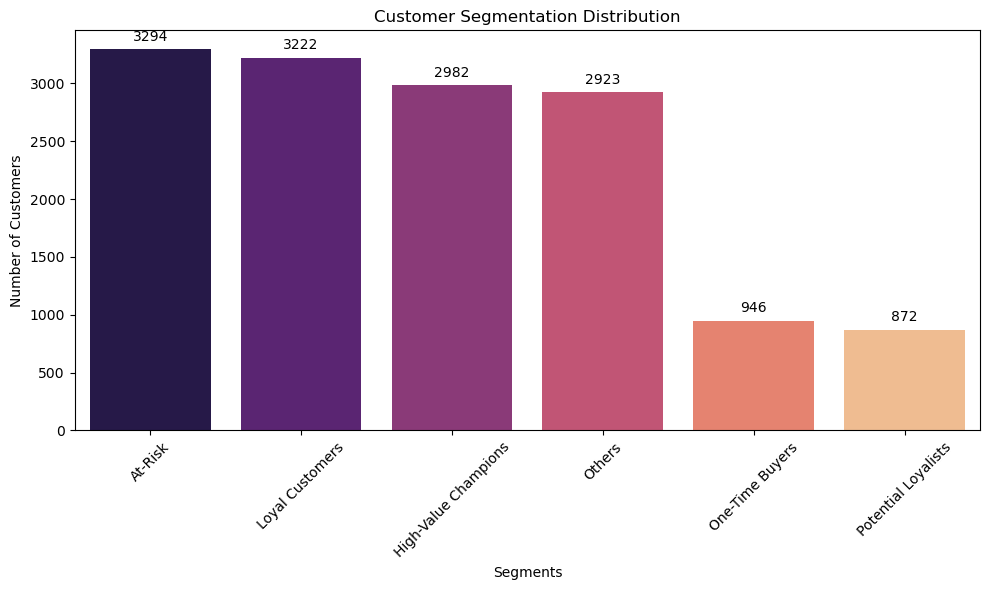

In [23]:
# Create a bar plot of the segments with Data labels
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="magma")
for i, value in enumerate(segment_counts.values):
    plt.text(i, value + 50, str(value), ha='center', va='bottom', fontsize=10)
plt.title("Customer Segmentation Distribution")
plt.xlabel("Segments")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Merge rfm_df info back to merged_df data with custom suffixes to avoid duplicate columns
enhanced_df = merged_df.merge(rfm_df[["customer_id", "Segment"]], on="customer_id", how="left")

# Check the enhanced dataframe
enhanced_df.head()

,customer_id,order_id,order_date,category,product_name,price,Segment
0,CUST00001,O420277,2023-03-23,Luxury Collection,Royal Rose,96.25,Others
1,CUST00001,O526677,2023-03-27,Unisex Blends,Woody Spice,97.23,Others
2,CUST00001,O674463,2024-01-26,Everyday Wear,Ocean Breeze,94.45,Others
3,CUST00001,O709154,2024-04-06,Luxury Collection,Royal Rose,96.25,Others
4,CUST00002,O461450,2023-12-14,Luxury Collection,Amber Oud,92.80,Others


In [36]:
# Group by Segment and product_name to count number of purchases and sum of spending
product_pref_by_segment = enhanced_df.groupby(["Segment", "product_name"]).agg(
    Purchase_Count=("order_id", "count"),
    Total_Spend=("price", "sum")
).reset_index().sort_values(by=["Segment", "Total_Spend"], ascending=[True, False])

# Check the product preference by segment
product_pref_by_segment

,Segment,product_name,Purchase_Count,Total_Spend
8,At-Risk,Woody Spice,602,58532.46
3,At-Risk,Ocean Breeze,587,55442.15
5,At-Risk,Saffron Musk,584,55409.92
4,At-Risk,Royal Rose,568,54670.00
7,At-Risk,Velvet Oud,545,52260.05
2,At-Risk,Green Vetiver,542,52091.62
0,At-Risk,Amber Oud,549,50947.20
6,At-Risk,Smoky Leather,526,50790.56
1,At-Risk,Citrus Fresh,533,50459.11
15,High-Value Champions,Smoky Leather,1733,167338.48
